In [1]:
"""Lean Project Valuation Model - Sensitivity Analysis
"""

import numpy as np
from numpy.random import RandomState
import pandas as pd
from matplotlib import pyplot as plt

from processes import GeometricBrownianMotion
from lpv import LeanProjectValuation

# Plotting constants
FIGSIZE = (8,6)


# Sensitivity Analysis - Project Volatility

## Research Questions

1. How does project volatility vary with the volaility of the underlying expected cashflow?

Here we analyze the volatility of the expected cashflows along with pivot shocks, first removing the pivot shocks to see that their volatilities are equal and second introducing pivot shocks.

While this isn't the full project value, since the cost process is deterministic, all the project volatility is captured in this process, and all exercise decisions depend on it.

In the figures below, the blue scatter plot is the simulation with optimal exercise decisions implemented while the orange is the naive implementation without optimal exercise (that is, no projects are abandoned early).


In [2]:
# Default Simulation Parameters
N = 10000      # no simulations
T = 3          # simulation periods
STEP = 365     # timesteps per period
TIME_ARRAY = np.linspace(0, T, STEP*T+1)
SEED = 1234

# Parameters
CF_INIT = 1.0
K = 1.0
CF_MU = 0.02
CF_SIGMA = 0.2
R = 0.05

def project_stats(pivot_dec, exercise_dec):
    pivots = [d for d,_,_ in pivot_dec[1]]
    exercises = [ d for _,d,_,_ in exercise_dec]

    abandons = [p for p,d in zip(pivots, exercises) if d == -1]
    completions = [p for p,d in zip(pivots, exercises) if d == 1] 

    abandon_pivots = float(abandons.count(1))/N
    abandon_nopivots = float(abandons.count(0))/N
    completion_pivots = float(completions.count(1))/N
    completion_nopivots = float(completions.count(0))/N

    # Create a dictionary to initialize the DataFrame
    data = {
        "pivot": [abandon_pivots, completion_pivots],
        "no-pivot": [abandon_nopivots, completion_nopivots]
    }
    # Create the DataFrame
    df = pd.DataFrame(data, index=["Abandons", "Completions"])
    # Add row sums
    df["% of Total"] = df.sum(axis=1)
    # Add column sums
    df.loc["% of Total"] = df.sum()
    return df

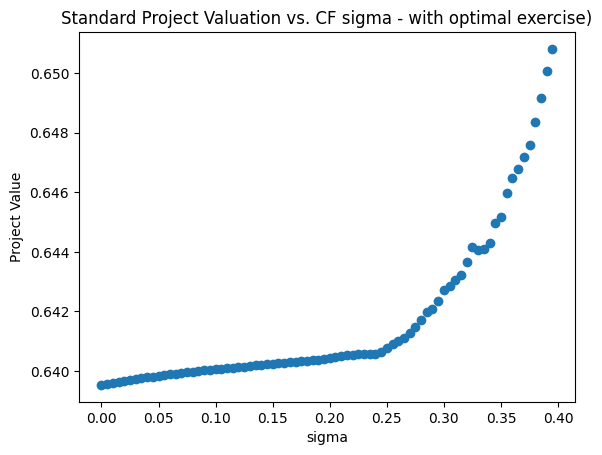


Plotting project volatility as a function of cashflow volatility (sigma) with the following parameters held constant:


Initial Estimated Cashflow: 1.0

Cashflow Drift (mu): 0.02

Development Cost per Investment: 1.0

Interest Rate (r): 0.05

No. Simulations (N): 10000




In [3]:
# Project valuation vs underlying volatility without pivots
ra = np.arange(0, 0.4, 0.005)
projects = [LeanProjectValuation(CF_MU,
                                 sigma,
                                 CF_INIT,
                                 K,
                                 R, 
                                 rand_seed=SEED,
                                 no_sims=N,
                                 disable_pivots=True) for sigma in ra]
vals = [p.valuation(TIME_ARRAY, 3) for p in projects]

# Plot results
plt.title("Standard Project Valuation vs. CF sigma - with optimal exercise)")
plt.xlabel("sigma")
plt.ylabel("Project Value")
plt.scatter(ra, vals)

description=f"""
Plotting project volatility as a function of cashflow volatility (sigma) with the following parameters held constant:\n\n
Initial Estimated Cashflow: {CF_INIT}\n
Cashflow Drift (mu): {CF_MU}\n
Development Cost per Investment: {K}\n
Interest Rate (r): {R}\n
No. Simulations (N): {N}\n
"""

# 45 degree line
#plt.axline((0,0),slope=1)

plt.show()
print(description)

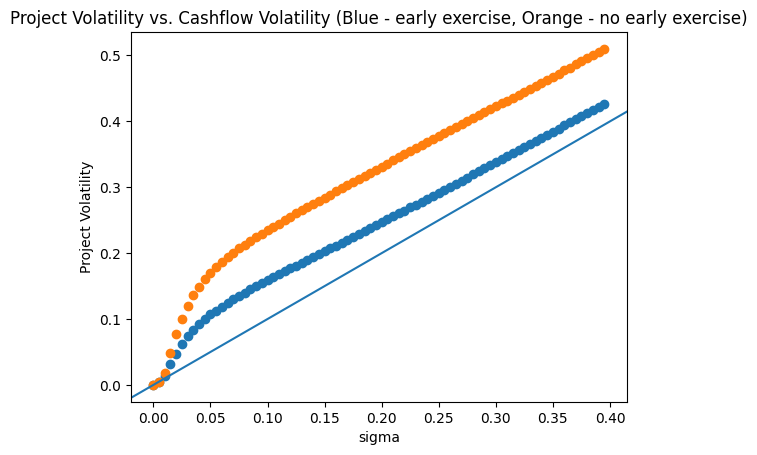


Plotting project volatility as a function of cashflow volatility (sigma) with the following parameters held constant:


Initial Estimated Cashflow: 1.0

Cashflow Drift (mu): 0.02

Development Cost per Investment: 1.0

Interest Rate (r): 0.05

No. Simulations (N): 10000




In [4]:
# Project Vol as a fn of Cashflow Vol
ra = np.arange(0, 0.4, 0.005)
projects = [LeanProjectValuation(CF_MU,
                                 sigma,
                                 CF_INIT,
                                 K,
                                 R, 
                                 rand_seed=SEED,
                                 no_sims=N,
                                 disable_pivots=False) for sigma in ra]
proj_vols = [p.volatility(TIME_ARRAY, 3) for p in projects]
naive_proj_vols = [p.volatility(TIME_ARRAY, 3, unaltered=True) for p in projects]

# Plot results
plt.title("Project Volatility vs. Cashflow Volatility (Blue - early exercise, Orange - no early exercise)")
plt.xlabel("sigma")
plt.ylabel("Project Volatility")
plt.scatter(ra, proj_vols)
plt.scatter(ra, naive_proj_vols)

description=f"""
Plotting project volatility as a function of cashflow volatility (sigma) with the following parameters held constant:\n\n
Initial Estimated Cashflow: {CF_INIT}\n
Cashflow Drift (mu): {CF_MU}\n
Development Cost per Investment: {K}\n
Interest Rate (r): {R}\n
No. Simulations (N): {N}\n
"""

# 45 degree line
plt.axline((0,0),slope=1)

plt.show()
print(description)

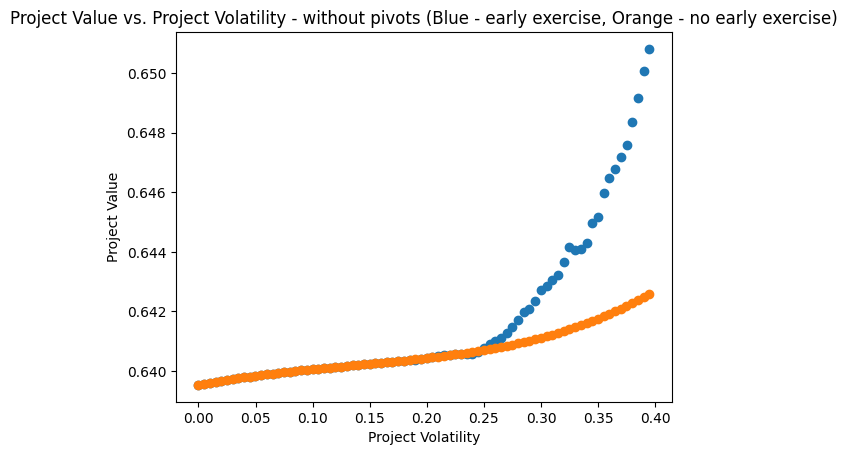


Plotting project valuation as a function of project volatility (effective volatility) with the following parameters held constant:


Initial Estimated Cashflow: 1.0

Cashflow Drift (mu): 0.02

Development Cost per Investment: 1.0

Interest Rate (r): 0.05

No. Simulations (N): 10000




In [5]:
# Project value vs. project volatility
cf_vols = np.arange(0, 0.4, 0.005)
projects = [LeanProjectValuation(CF_MU,
                                 sigma,
                                 CF_INIT,
                                 K,
                                 R, 
                                 rand_seed=SEED,
                                 no_sims=N,
                                 disable_pivots=True) for sigma in cf_vols]
# project valuation range
proj_vols = [p.volatility(TIME_ARRAY, 3) for p in projects]
naive_proj_vols = [p.volatility(TIME_ARRAY, 3, unaltered=True) for p in projects]
proj_vals = [p.valuation(TIME_ARRAY, 3) for p in projects]
naive_proj_vals = [p.valuation(TIME_ARRAY, 3, unaltered=True) for p in projects]

# Plot results
plt.title("Project Value vs. Project Volatility - without pivots (Blue - early exercise, Orange - no early exercise)")
plt.xlabel("Project Volatility")
plt.ylabel("Project Value")
plt.scatter(proj_vols, proj_vals)
plt.scatter(naive_proj_vols, naive_proj_vals)

description=f"""
Plotting project valuation as a function of project volatility (effective volatility) with the following parameters held constant:\n\n
Initial Estimated Cashflow: {CF_INIT}\n
Cashflow Drift (mu): {CF_MU}\n
Development Cost per Investment: {K}\n
Interest Rate (r): {R}\n
No. Simulations (N): {N}\n
"""

# 45 degree line
# plt.axline((0,0),slope=1)

plt.show()
print(description)

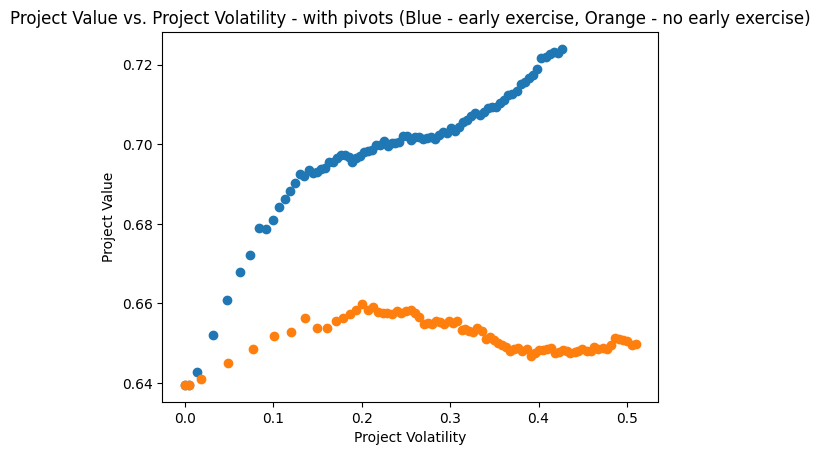


Plotting project valuation as a function of project volatility (effective volatility) with the following parameters held constant:


Initial Estimated Cashflow: 1.0

Cashflow Drift (mu): 0.02

Development Cost per Investment: 1.0

Interest Rate (r): 0.05

No. Simulations (N): 10000



Project Volatility: 0.15891136099205852, Expected Cashflow Volatility: 0.1
Abandonment Option Value: 0.03674034915918023
              pivot  no-pivot  % of Total
Abandons     0.0000    0.0804      0.0804
Completions  0.5705    0.3491      0.9196
% of Total   0.5705    0.4295      1.0000

Project Volatility: 0.2467977870356968, Expected Cashflow Volatility: 0.2
Abandonment Option Value: 0.04830068935424581
              pivot  no-pivot  % of Total
Abandons     0.0000    0.1062      0.1062
Completions  0.5146    0.3792      0.8938
% of Total   0.5146    0.4854      1.0000

Project Volatility: 0.33799262072757974, Expected Cashflow Volatility: 0.3
Abandonment Option Value: 0.060206030972932645
            

In [8]:
# Project value vs. project volatility
cf_vols = np.arange(0, 0.4, 0.005)
projects = [LeanProjectValuation(CF_MU,
                                 sigma,
                                 CF_INIT,
                                 K,
                                 R, 
                                 rand_seed=SEED,
                                 no_sims=N,
                                 disable_pivots=False) for sigma in cf_vols]
# project valuation range
proj_vols = [p.volatility(TIME_ARRAY, 3) for p in projects]
naive_proj_vols = [p.volatility(TIME_ARRAY, 3, unaltered=True) for p in projects]
proj_vals = [p.valuation(TIME_ARRAY, 3) for p in projects]
naive_proj_vals = [p.valuation(TIME_ARRAY, 3, unaltered=True) for p in projects]

# Plot results
plt.title("Project Value vs. Project Volatility - with pivots (Blue - early exercise, Orange - no early exercise)")
plt.xlabel("Project Volatility")
plt.ylabel("Project Value")
plt.scatter(proj_vols, proj_vals)
plt.scatter(naive_proj_vols, naive_proj_vals)

description=f"""
Plotting project valuation as a function of project volatility (effective volatility) with the following parameters held constant:\n\n
Initial Estimated Cashflow: {CF_INIT}\n
Cashflow Drift (mu): {CF_MU}\n
Development Cost per Investment: {K}\n
Interest Rate (r): {R}\n
No. Simulations (N): {N}\n
"""

# 45 degree line
# plt.axline((0,0),slope=1)

plt.show()
print(description)

# Single Project
for sigma in [0.1, 0.2, 0.3, 0.4, 0.5]:
    proj = LeanProjectValuation(CF_MU, sigma, CF_INIT, K, R, rand_seed=SEED, no_sims=N)
    vol_optimal = proj.volatility(TIME_ARRAY, 3)
    vol_naive = proj.volatility(TIME_ARRAY, 3, unaltered=True)

    val_naive = proj.valuation(TIME_ARRAY, 3, unaltered=True)
    val_optimal = proj.valuation(TIME_ARRAY, 3)
    abandon_opt_val = val_optimal - val_naive

    print(f"\nProject Volatility: {vol_optimal}, Expected Cashflow Volatility: {sigma}")
    print(f"Abandonment Option Value: {abandon_opt_val}")
    
    stats = project_stats(proj.pivot_decisions, proj.exercise_decisions)
    print(stats)